In [324]:
import os
import h5py
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt

In [325]:
data = natsorted(os.listdir("data/trained_models"))

# An h5 file is supposed to be a dictionary of labeled datasets.
gm_h5 = h5py.File("data/EPInformer/GM12878_enhancer_promoter_encoding.rna_encoding.hg38.h5")
k5_h5 = h5py.File("data/EPInformer/K562_enhancer_promoter_encoding.rna_encoding.hg38.h5")

In [326]:
def decode_and_plot(df, h5):
    # Grabs the rows that match the condition we set (negative predictions, error threshold, etc).
    bool_df = [gene.decode() in df for gene in h5["ensid"]]
    rna_signals = h5["rna"][:][bool_df]

    # Only look at the graphs that have a signal.
    filtered_0s = rna_signals[np.any(rna_signals != 0, axis = 1)]
    signal_index = np.where(np.any(rna_signals != 0, axis = 1))[0]
    only_0s_index = np.where(np.any(rna_signals == 0, axis = 1))[0]
    tss_signal = [gene.decode() for gene in h5["ensid"][:][signal_index]]
    tss_no_signal = [gene.decode() for gene in h5["ensid"][:][only_0s_index]]

    print(f"Total Number of Matches: {len(rna_signals)}")
    print(f"Total Matches with >= 1 Non-Zero Value: {len(filtered_0s)}")

    print(f"TSSs w/ Signal: {tss_signal}")
    print(f"TSSs w/ No Signal: {tss_no_signal}")

    for signal in filtered_0s[0:5]:
        plt.plot(signal)
    return tss_signal, tss_no_signal

In [327]:
def test_thresholds(dict, h5, conditional_column, thresholds, operand):
    for threshold in thresholds:
        if operand == "g":
            ensid_matches = list(dict[dict[conditional_column] > threshold].iloc[:, 0])
        elif operand == "gt":
            ensid_matches = list(dict[dict[conditional_column] >= threshold].iloc[:, 0])
        elif operand == "l":
            ensid_matches = list(dict[dict[conditional_column] < threshold].iloc[:, 0])
        elif operand == "lt":
            ensid_matches = list(dict[dict[conditional_column] <= threshold].iloc[:, 0])

        print(f"Threshold: {threshold}")
        decode_and_plot(ensid_matches, h5)
        plt.show()
        plt.clf()

In [328]:
results_dict = {}
results_dict["GM12878"] = pd.DataFrame()
results_dict["K562"] = pd.DataFrame()

for file in data:
    df = pd.read_csv(f"data/trained_models/{file}")
    if "GM12878" in file:
        results_dict["GM12878"] = pd.concat([results_dict["GM12878"], df], ignore_index=True)
    else:
        results_dict["K562"] = pd.concat([results_dict["K562"], df], ignore_index=True)

print(f"Num Rows (GM12878): {len(results_dict["GM12878"])}")
print(f"Num Rows (K562): {len(results_dict["K562"])}")

Num Rows (GM12878): 28357
Num Rows (K562): 28357


In [329]:
neg_pred_dict = {}
neg_pred_dict["GM12878"] = []
neg_pred_dict["K562"] = []

low_error_dict = {}
low_error_dict["GM12878"] = []
low_error_dict["K562"] = []

high_error_dict = {}
high_error_dict["GM12878"] = []
high_error_dict["K562"] = []

for key in results_dict.keys():
    print(f"{key}: ")
    results_dict[key]["Error"] = abs(results_dict[key]["Pred"] - results_dict[key]["actual"])
    results_dict[key]["Signed Error"] = results_dict[key]["Pred"] - results_dict[key]["actual"]

    print(f"Mean Error per Fold:\n{results_dict[key].groupby("fold_idx")["Error"].mean()}")

    print(f"\nMax Error Fold: {results_dict[key].groupby("fold_idx")["Error"].mean().max()} at Fold {results_dict[key].groupby("fold_idx")["Error"].mean().idxmax()}")

    print(f"\nMin Error Fold: {results_dict[key].groupby("fold_idx")["Error"].mean().min()} at Fold {results_dict[key].groupby("fold_idx")["Error"].mean().idxmin()}")

    print(f"\nMean Error: {results_dict[key]["Error"].mean()}")

    print(f"\nMax Error: {results_dict[key]["Error"].max()}")

    print(f"\nMin Error: {results_dict[key]["Error"].min()} \n")

GM12878: 
Mean Error per Fold:
fold_idx
1     0.481959
2     0.462896
3     0.448480
4     0.401176
5     0.483600
6     0.493191
7     0.453553
8     0.510620
9     0.459719
10    0.482234
11    0.491844
12    0.465200
Name: Error, dtype: float64

Max Error Fold: 0.5106199704772214 at Fold 8

Min Error Fold: 0.4011763194403461 at Fold 4

Mean Error: 0.4721234398075166

Max Error: 4.650927579999999

Min Error: 4.979999999998874e-05 

K562: 
Mean Error per Fold:
fold_idx
1     0.487613
2     0.487481
3     0.509309
4     0.409071
5     0.511217
6     0.462325
7     0.489290
8     0.525177
9     0.510695
10    0.506246
11    0.484115
12    0.508029
Name: Error, dtype: float64

Max Error Fold: 0.5251767962132975 at Fold 8

Min Error Fold: 0.409071202792056 at Fold 4

Mean Error: 0.4940765429518559

Max Error: 4.908513902

Min Error: 1.8000000000073513e-05 



Negative Predictions

Threshold: 0
Total Number of Matches: 334
Total Matches with >= 1 Non-Zero Value: 60
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000240409', 'ENSG00000272438', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000187961', 'ENSG00000187642', 'ENSG00000304119', 'ENSG00000162571', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000107404', 'ENSG00000221978', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000197530_1', 'ENSG00000169885', 'ENSG00000067606_1', 'ENSG00000116151_1', 'ENSG00000157873_2', 'ENSG00000157870', 'ENSG00000169717', 'ENSG00000238260', 'ENSG00000078900_1', 'ENSG00000235169', 'ENSG00000169598_1', 'ENSG00000131697', 'ENSG00000158286', 'ENSG00000097021_1', 'ENSG00000041988', 'ENSG00000041988_1', 'ENSG00000007923', 'ENSG00000049245', 'ENSG00000049246', 'ENSG00000049247', 'ENSG00000116285', 'ENSG00000074800_1', 'ENSG00000049239', 'ENSG00000188807', 'ENSG00000171603', 'ENSG00000054523', 'ENSG00000142657', 'ENSG00000120948_1', 'ENSG00000116670', 

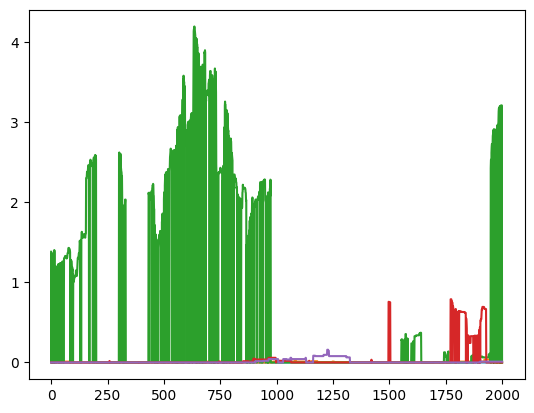

Threshold: 0
Total Number of Matches: 532
Total Matches with >= 1 Non-Zero Value: 108
TSSs w/ Signal: ['ENSG00000107404', 'ENSG00000228594', 'ENSG00000157933_1', 'ENSG00000116151', 'ENSG00000149527_1', 'ENSG00000236423', 'ENSG00000116254', 'ENSG00000116251_1', 'ENSG00000158286', 'ENSG00000116251_2', 'ENSG00000158292', 'ENSG00000097021_2', 'ENSG00000069812', 'ENSG00000187017', 'ENSG00000187017_2', 'ENSG00000041988', 'ENSG00000171735_1', 'ENSG00000049249', 'ENSG00000116288', 'ENSG00000116288_1', 'ENSG00000227634', 'ENSG00000142599_1', 'ENSG00000074800_1', 'ENSG00000142583_1', 'ENSG00000142583_3', 'ENSG00000180758', 'ENSG00000228526', 'ENSG00000228526_1', 'ENSG00000228526_2', 'ENSG00000171621', 'ENSG00000130939', 'ENSG00000160049', 'ENSG00000142655', 'ENSG00000230337', 'ENSG00000132879', 'ENSG00000116663', 'ENSG00000116670', 'ENSG00000177000_1', 'ENSG00000011021', 'ENSG00000116688_2', 'ENSG00000048707_1', 'ENSG00000048707_3', 'ENSG00000171729', 'ENSG00000142634', 'ENSG00000142627', 'ENSG0

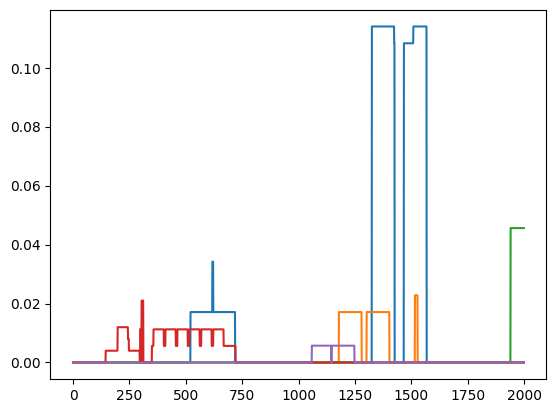

<Figure size 640x480 with 0 Axes>

In [330]:
test_thresholds(results_dict["GM12878"], gm_h5, "Pred", [0], "l")
test_thresholds(results_dict["K562"], k5_h5, "Pred", [0], "l")

Low Errors

In [331]:
results_dict["GM12878"]["Error"].quantile([0.01, 0.05, 0.1])

0.01    0.005350
0.05    0.027846
0.10    0.057697
Name: Error, dtype: float64

In [332]:
results_dict["K562"]["Error"].quantile([0.01, 0.05, 0.1])

0.01    0.005069
0.05    0.025330
0.10    0.051010
Name: Error, dtype: float64

GM12878: 
Threshold: 0.001
Total Number of Matches: 33
Total Matches with >= 1 Non-Zero Value: 15
TSSs w/ Signal: ['ENSG00000225630', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000186891', 'ENSG00000176022']
TSSs w/ No Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG0000018689

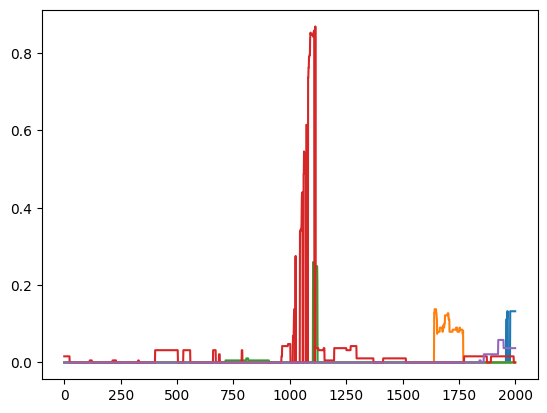

Threshold: 0.01
Total Number of Matches: 526
Total Matches with >= 1 Non-Zero Value: 244
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000188157', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000169972', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000197530', 'ENSG00000197530_1', 'ENSG00000178821', 'ENSG00000067606_1', 'ENSG00000067606_3', 'ENSG00000157933', 'ENSG00000116151', 'ENSG00000116151_1', 'ENSG00000157881', 'ENSG00000157873', 'ENSG00000238164', 'ENSG00000287396', 'ENSG00000162591', 'ENSG00000078900', 'ENSG00000078900_1', 'ENSG00000235169', 'ENSG00000284668', 'ENSG00000069424', 'ENSG00000116254', 'ENSG00000285629', 'ENSG00000116251', 'ENS

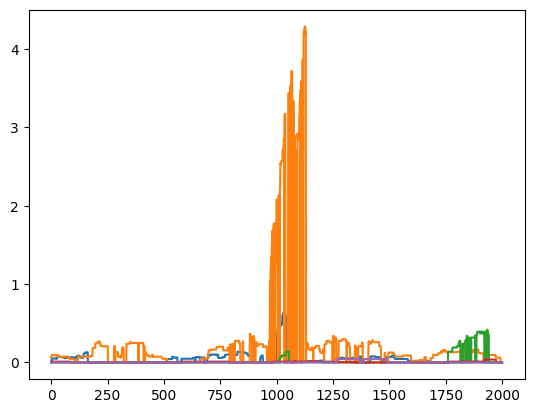

Threshold: 0.1
Total Number of Matches: 5106
Total Matches with >= 1 Non-Zero Value: 2503
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571_1', 'ENSG00000186827', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000175756', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000160072', 'ENSG00000197785', 'ENSG00000197530', 'ENSG00000272106', 'ENSG00000197530_2', 'ENSG00000189409', 'ENSG00000248333', 'ENSG00000078369', 'ENSG00000078369_1', 'ENSG00000169885', 'ENSG00000178821', 'ENSG0000

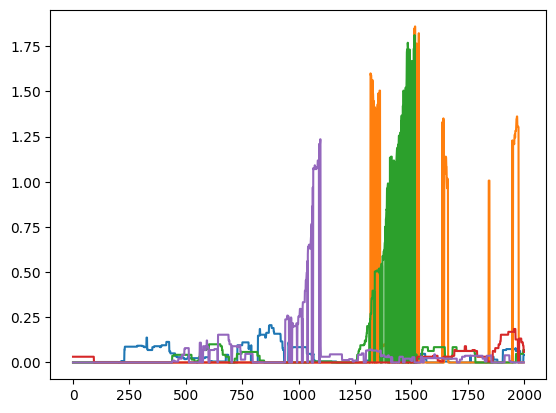

K562: 
Threshold: 0.001
Total Number of Matches: 58
Total Matches with >= 1 Non-Zero Value: 25
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000272438', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000131591', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000184163', 'ENSG00000160087', 'ENSG00000127054', 'ENSG00000242485', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000160075', 'ENSG00000160075_1', 'ENSG00000272106']
TSSs w/ No Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642',

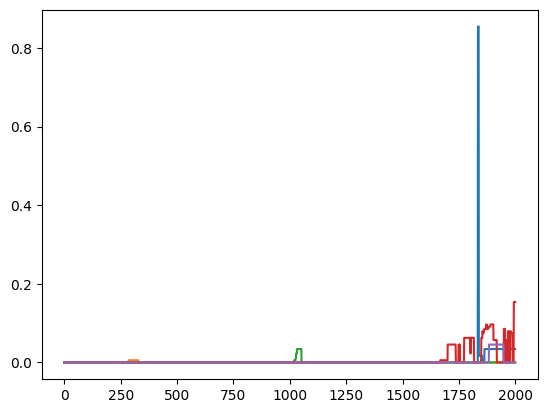

Threshold: 0.01
Total Number of Matches: 565
Total Matches with >= 1 Non-Zero Value: 216
TSSs w/ Signal: ['ENSG00000225630', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188157', 'ENSG00000186827', 'ENSG00000131584', 'ENSG00000224051_1', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000175756', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000228594', 'ENSG00000197530_2', 'ENSG00000189409', 'ENSG00000189339', 'ENSG00000008128', 'ENSG00000008130', 'ENSG00000078369', 'ENSG00000078369_1', 'ENSG00000169885', 'ENSG00000067606_1', 'ENSG00000067606_2', 'ENSG00000067606_3', 'ENSG00000157881', 'ENSG00000157873_1', 'ENSG00000157873_2', 'ENSG00000287396', 'ENSG00000130762_1', 'ENSG00000078900', 'ENSG00000235169', 'ENSG00000169598_1', 'ENSG00000198912', 'ENSG00000069424_1', 'ENSG00000116254', 'ENSG00000285629', 'ENSG0000

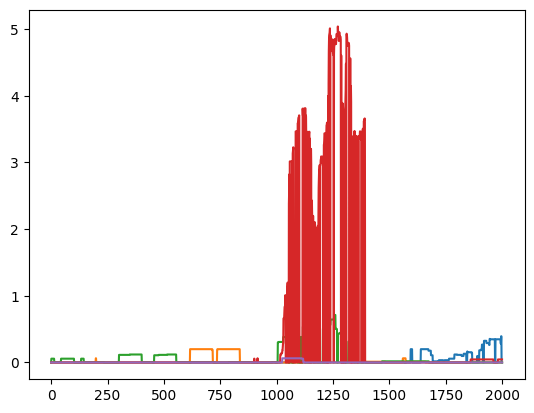

Threshold: 0.1
Total Number of Matches: 5535
Total Matches with >= 1 Non-Zero Value: 2322
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000272438', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000169962', 'ENSG00000162576', 'ENSG00000175756', 'ENSG00000221978', 'ENSG00000242485', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000197785', 'ENSG00000160075_1', 'ENSG00000197530', 'ENSG00000272106', 'ENSG00000248333', 'ENSG00000189339', 'ENSG00000008128', 'ENSG00000078369', 'ENSG00000078369_1', 'ENSG0000

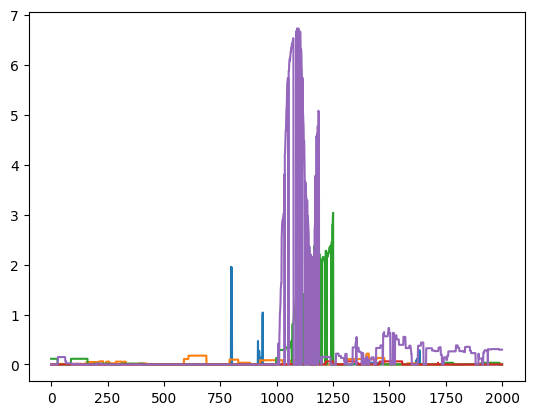

<Figure size 640x480 with 0 Axes>

In [333]:
print("GM12878: ")
test_thresholds(results_dict["GM12878"], gm_h5, "Error", [0.001, 0.01, 0.1], "l")

print("K562: ")
test_thresholds(results_dict["K562"], k5_h5, "Error", [0.001, 0.01, 0.1], "l")

High Errors

In [334]:
results_dict["GM12878"]["Error"].quantile([0.9, 0.95, 0.99])

0.90    1.079988
0.95    1.487276
0.99    2.266954
Name: Error, dtype: float64

In [335]:
results_dict["K562"]["Error"].quantile([0.9, 0.95, 0.99])

0.90    1.176917
0.95    1.627252
0.99    2.358835
Name: Error, dtype: float64

GM12878: 
Threshold: 1
Total Number of Matches: 3309
Total Matches with >= 1 Non-Zero Value: 2560
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000237973', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000228794_1', 'ENSG00000272438', 'ENSG00000187634', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000237330', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000160087', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000107404', 'ENSG00000175756', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000197785', 'ENSG00000160075', 'ENSG00000160075_1', 'ENSG00000228594', '

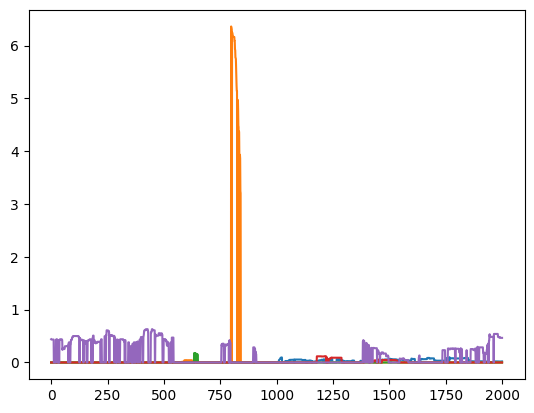

Threshold: 1.5
Total Number of Matches: 1396
Total Matches with >= 1 Non-Zero Value: 1152
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000237973', 'ENSG00000240409', 'ENSG00000237491', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000160087', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000175756', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00

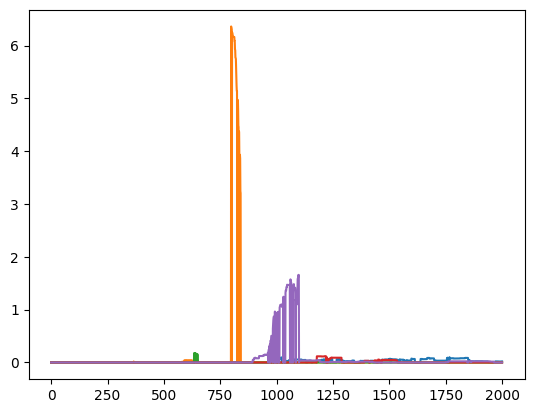

Threshold: 2
Total Number of Matches: 546
Total Matches with >= 1 Non-Zero Value: 474
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000160087', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000175756', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160

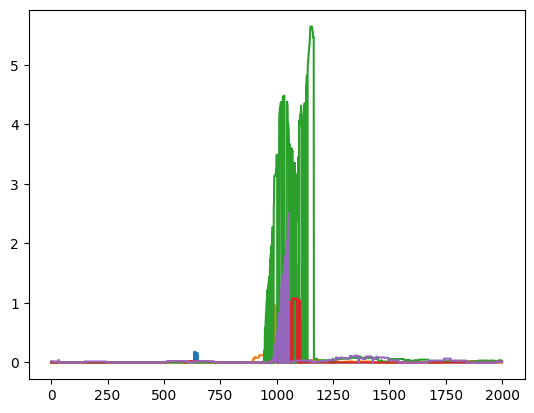

K562: 
Threshold: 1
Total Number of Matches: 3826
Total Matches with >= 1 Non-Zero Value: 2689
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000160087', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000197785', 'E

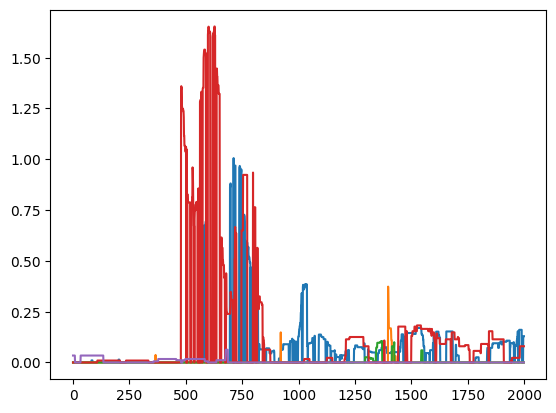

Threshold: 1.5
Total Number of Matches: 1739
Total Matches with >= 1 Non-Zero Value: 1360
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000228794', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000160087', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000175756', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000160075', 'ENSG0000

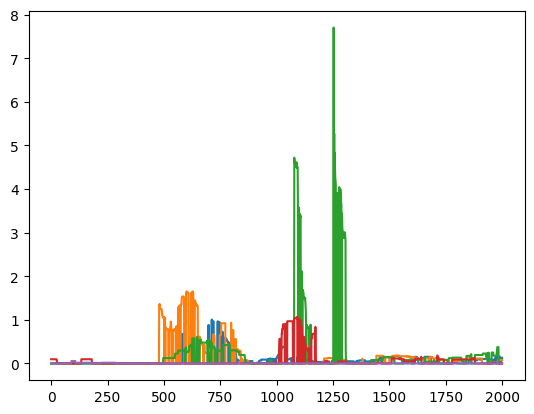

Threshold: 2
Total Number of Matches: 752
Total Matches with >= 1 Non-Zero Value: 628
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000237973', 'ENSG00000229344', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000237330', 'ENSG00000131591', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000160087', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000175756', 'ENSG00000221978', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000160072', 'ENSG00000197785', 'ENSG00000160075', 'ENSG000001

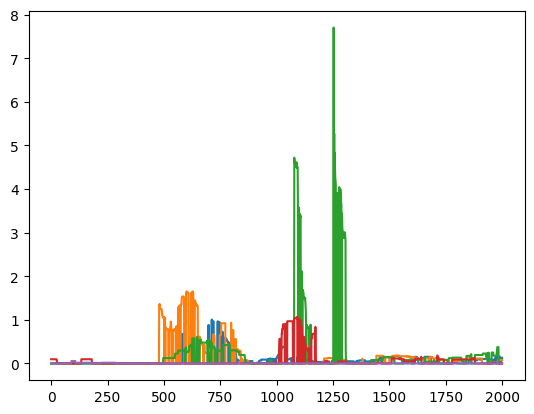

<Figure size 640x480 with 0 Axes>

In [336]:
print("GM12878: ")
test_thresholds(results_dict["GM12878"], gm_h5, "Error", [1, 1.5, 2], "g")

print("K562: ")
test_thresholds(results_dict["K562"], k5_h5, "Error", [1, 1.5, 2], "g")

Overestimates

GM12878: 
Threshold: 0
Total Number of Matches: 13192
Total Matches with >= 1 Non-Zero Value: 8456
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000237973', 'ENSG00000240409', 'ENSG00000198744', 'ENSG00000237491', 'ENSG00000228794_1', 'ENSG00000228794_2', 'ENSG00000272438', 'ENSG00000223764', 'ENSG00000187634', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187583', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000187608', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000131591', 'ENSG00000162571', 'ENSG00000162571_1', 'ENSG00000186827', 'ENSG00000176022', 'ENSG00000184163', 'ENSG00000160087', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000107404', 'ENSG00000224870', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000160075', 'ENSG00000228594', 'ENSG00000197530', 'ENSG00000189409', 'ENSG00000248333'

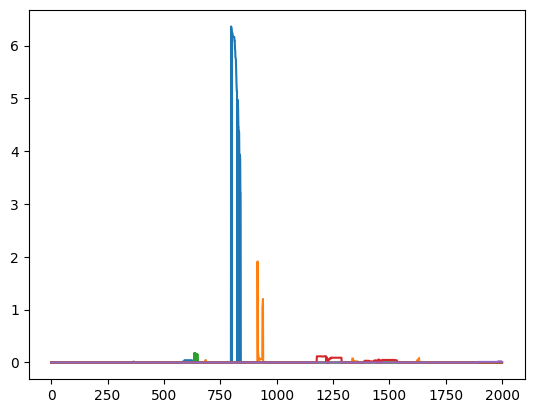

K562
Threshold: 0
Total Number of Matches: 11713
Total Matches with >= 1 Non-Zero Value: 6966
TSSs w/ Signal: ['ENSG00000310526', 'ENSG00000225630', 'ENSG00000240409', 'ENSG00000237491', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000228794_2', 'ENSG00000187634_1', 'ENSG00000187634_2', 'ENSG00000188976', 'ENSG00000187961', 'ENSG00000187642', 'ENSG00000188290', 'ENSG00000188157', 'ENSG00000291156', 'ENSG00000304119', 'ENSG00000162571', 'ENSG00000186891', 'ENSG00000186827', 'ENSG00000078808', 'ENSG00000131584', 'ENSG00000169972', 'ENSG00000127054', 'ENSG00000224051', 'ENSG00000224051_1', 'ENSG00000169962', 'ENSG00000107404', 'ENSG00000162576', 'ENSG00000242485', 'ENSG00000235098', 'ENSG00000205116', 'ENSG00000179403', 'ENSG00000215915', 'ENSG00000160072', 'ENSG00000197785', 'ENSG00000160075', 'ENSG00000272106', 'ENSG00000197530_1', 'ENSG00000197530_2', 'ENSG00000248333', 'ENSG00000189339', 'ENSG00000008128', 'ENSG00000008130', 'ENSG00000078369', 'ENSG00000078369_1', 'ENSG00000169885', '

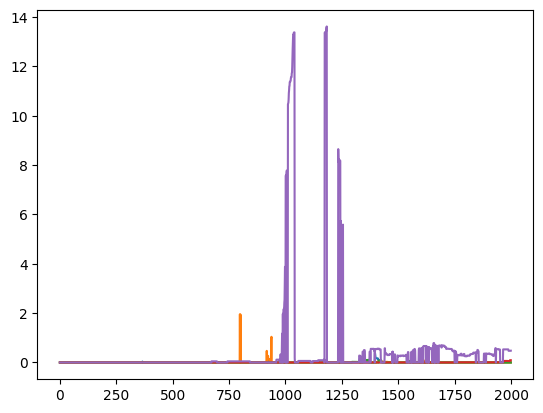

<Figure size 640x480 with 0 Axes>

In [337]:
print("GM12878: ")
test_thresholds(results_dict["GM12878"], gm_h5, "Signed Error", [0], "l")

print("K562")
test_thresholds(results_dict["K562"], k5_h5, "Signed Error", [0], "l")

Underestimates